<a href="https://colab.research.google.com/github/zznadazz/Face_Masks/blob/main/DL_FaceMasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload kaggle.json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadazzz","key":"9b2f14f79659cf97acb97984f6127d99"}'}

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 89% 146M/163M [00:01<00:00, 143MB/s]
100% 163M/163M [00:01<00:00, 135MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


#Importing Data

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

#View files

Viewing 5 Top/Bottom file names With and Without a Mask

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['with_mask_980.jpg', 'with_mask_368.jpg', 'with_mask_1047.jpg', 'with_mask_1105.jpg', 'with_mask_830.jpg']
['with_mask_3254.jpg', 'with_mask_326.jpg', 'with_mask_3150.jpg', 'with_mask_2329.jpg', 'with_mask_2470.jpg']
['without_mask_52.jpg', 'without_mask_2190.jpg', 'without_mask_3402.jpg', 'without_mask_664.jpg', 'without_mask_829.jpg']
['without_mask_1568.jpg', 'without_mask_1469.jpg', 'without_mask_3164.jpg', 'without_mask_2775.jpg', 'without_mask_3632.jpg']


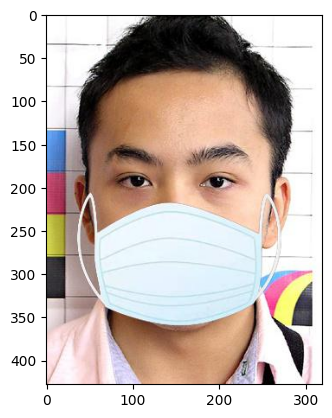

In [ ]:
a = with_mask_files[1]

img = mpimg.imread('/content/data/with_mask/with_mask_1557.jpg')  # Charger l'image
#img = img_to_array(img)  # Convertir en tableau numpy
plt.imshow(img)

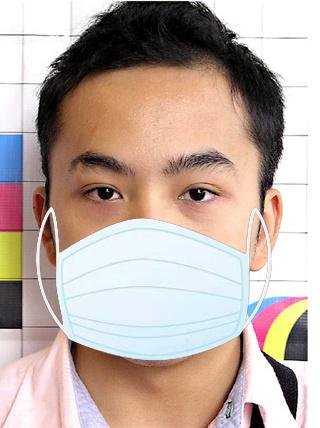

In [ ]:
nb = Image.open("/content/data/with_mask/with_mask_1557.jpg")
display(nb)

Number of with/without mask images to see whether we need to fix imnalencement in data, in our case we don't

In [ ]:
print('Number of with mask images', len(with_mask_files))
print('Number of without mask images', len(without_mask_files))

Number of with mask images 3725
Number of without mask images 3828


#Processing

Convert images to numpy array

In [ ]:
def processing(data, path, files):
  for img_file in files:
    image = Image.open(path + img_file)
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)
  return data


In [ ]:
data = []
processing(data,'/content/data/with_mask/', with_mask_files)
len(data)
processing(data, '/content/data/without_mask/', without_mask_files)
len(data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0].shape

(128, 128, 3)

#Splitting

with mask --> 1

without mask --> 0

In [ ]:
wth_mask = [1]*3725
wthout_mask = [0]*3828
labels = wth_mask + wthout_mask
X = np.array(data)
y = np.array(labels)

In [ ]:
print('type X:', type(X), 'shape X:', X.shape)
print('type Y:', type(y), 'shape Y:', y.shape)

type X: <class 'numpy.ndarray'> shape X: (7553, 128, 128, 3)
type Y: <class 'numpy.ndarray'> shape Y: (7553,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [ ]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (6042, 128, 128, 3)
X_test.shape:  (1511, 128, 128, 3)
y_train.shape:  (6042,)
y_test.shape:  (1511,)


## Scaling data
(X - Xmin) / (Xmax - Xmin)

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print('X_train:', X_train[0][0], 'X_train_scaled', X_train_scaled[0][0])

X_train: [[255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 255]
 [255 255 252]
 [255 255 250]
 [255 255 250]
 [255 255 251]
 [255 255 251]
 [255 255 251]
 [255 254 251]
 [255 254 252]
 [255 253 253]
 [255 253 253]
 [255 253 254]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [255 254 255]
 [254 254 255]
 [254 254 255]
 [255 255 254]
 [255 254 253]
 [254 254 252]
 [254 254 253]
 [254 253 253]
 [253 253 252]
 [253 253 252]
 [253 252 251]
 [253 252 251]
 [254 254 252]
 

# Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# compile the neural network

In [ ]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 222s 1s/step - loss: 0.4986 - acc: 0.7714 - val_loss: 0.3045 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 203s 1s/step - loss: 0.3054 - acc: 0.8766 - val_loss: 0.2614 - val_acc: 0.8860
Epoch 3/5
170/170 [==============================] - 194s 1s/step - loss: 0.2551 - acc: 0.8959 - val_loss: 0.2803 - val_acc: 0.8843
Epoch 4/5
170/170 [==============================] - 196s 1s/step - loss: 0.2317 - acc: 0.9082 - val_loss: 0.2291 - val_acc: 0.9107
Epoch 5/5
170/170 [==============================] - 192s 1s/step - loss: 0.1883 - acc: 0.9277 - val_loss: 0.2206 - val_acc: 0.9157


# Results

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 23s 491ms/step - loss: 0.2302 - acc: 0.9193
Test Accuracy = 0.9192587733268738


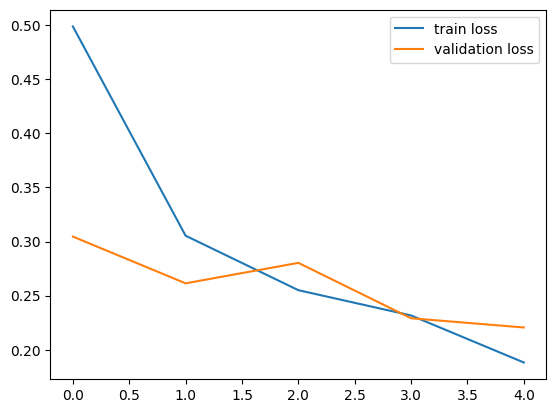

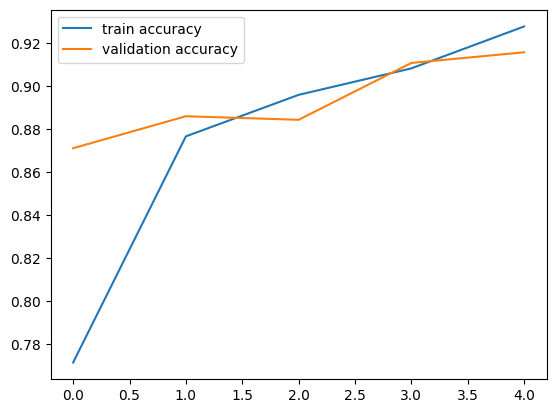

In [ ]:
h = history
# Loss
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# The accuracy level is 91%


